<a href="https://colab.research.google.com/github/11jolek11/BigDataHCVproject/blob/SMOTE/BigDataHCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q imbalanced-learn
# !pip install -q ipympl

# from google.colab import output
# output.enable_custom_widget_manager()

import matplotlib.pyplot as plt
# %matplotlib notebook
# /content/drive/MyDrive/Colab Notebooks/datasets/hcvdat0.csv

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
# TODO: KNN imputer może nie być najlepszym wyborem
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN

In [3]:
# hcv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/hcvdat0.csv', header=0)
hcv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/hcvdat0.csv', header=0)
hcv[hcv.isna().any(axis=1)]
print()

In [4]:
np.unique(hcv["Category"])

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [5]:
hcv.replace('1=Hepatitis', '1=HCV', inplace=True)
hcv.replace('2=Fibrosis', '1=HCV', inplace=True)
hcv.replace('3=Cirrhosis', '1=HCV', inplace=True)

In [6]:
hcv["Category"].value_counts()

0=Blood Donor             533
1=HCV                      75
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [7]:
# indexes_to_delete = hcv.index[hcv["Category"] == "0=Blood Donor"]
# drop_indices = np.random.choice(indexes_to_delete, 200, replace=False)
# hcv.drop(drop_indices, inplace=True)
hcv.drop(hcv[hcv["Category"] == '0s=suspect Blood Donor'].index, inplace=True)

In [8]:
hcv["Category"].value_counts()

0=Blood Donor    533
1=HCV             75
Name: Category, dtype: int64

In [9]:
# sns.countplot(x=hcv["Category"])

In [10]:
# sns.heatmap(hcv.corr(), annot=True, cmap='rainbow')

In [11]:
encoder = LabelEncoder()
hcv["Sex"] = encoder.fit_transform(hcv["Sex"])
hcv["Category"] = encoder.fit_transform(hcv["Category"])

In [12]:
imputer = IterativeImputer(max_iter=10, random_state=0).set_output(transform="pandas")
hcv = imputer.fit_transform(hcv)
hcv[hcv.isna().any(axis=1)]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT


In [13]:
hcv.shape

(608, 14)

In [14]:
hcv_target = hcv["Category"]
hcv.drop(columns=["Category"], inplace=True)

In [15]:
# pca_pipeline = Pipeline(
#     [
#       ('scaler', StandardScaler()),
#       ('pca_dim_reduction', PCA(n_components=3)),
#     ]
# )

# hcv_pca = pd.DataFrame(pca_pipeline.fit_transform(hcv), columns = ['pca1', 'pca2', 'pca3'])

#PCA n=2

In [16]:
pca_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('pca_dim_reduction', PCA(n_components=2)),
    ]
)

hcv_pca = pd.DataFrame(pca_pipeline.fit_transform(hcv), columns = ['pca1', 'pca2'])

In [17]:
std_scaler = StandardScaler()

smote = SMOTE()
adasyn = ADASYN()
smoteenn = SMOTEENN()

In [18]:
# x_train, x_test, y_train, y_test = train_test_split(hcv, hcv_target, stratify=hcv_target)
x_train, x_test, y_train, y_test = train_test_split(hcv_pca, hcv_target, stratify=hcv_target)

x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

X_train_smt, Y_train_smt = smote.fit_resample(x_train, y_train)
X_train_ada, Y_train_ada = adasyn.fit_resample(x_train, y_train)
X_train_enn, Y_train_enn = smoteenn.fit_resample(x_train, y_train)

In [19]:
print(X_train_smt.shape)
print(X_train_ada.shape)
print(X_train_enn.shape)
print()

print(Y_train_smt.shape)
print(Y_train_ada.shape)
print(Y_train_enn.shape)
print()


temp, count = np.unique(Y_train_smt, return_counts=True)
print(np.asarray((temp, count)).T)
print()

temp, count = np.unique(Y_train_ada, return_counts=True)
print(np.asarray((temp, count)).T)
print()

temp, count = np.unique(Y_train_enn, return_counts=True)
print(np.asarray((temp, count)).T)
print()

(800, 2)
(795, 2)
(605, 2)

(800,)
(795,)
(605,)

[[  0. 400.]
 [  1. 400.]]

[[  0. 400.]
 [  1. 395.]]

[[  0. 288.]
 [  1. 317.]]



<Axes: xlabel='pca1', ylabel='pca2'>

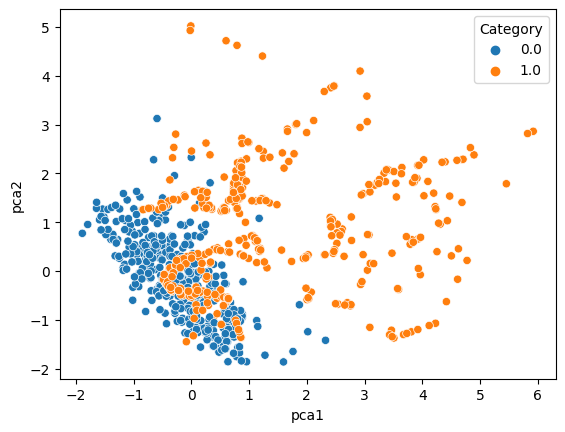

In [20]:
temp = pd.DataFrame(X_train_smt, columns=['pca1', 'pca2'])
sns.scatterplot(data=temp, x="pca1", y="pca2", hue=Y_train_smt)

<Axes: xlabel='pca1', ylabel='pca2'>

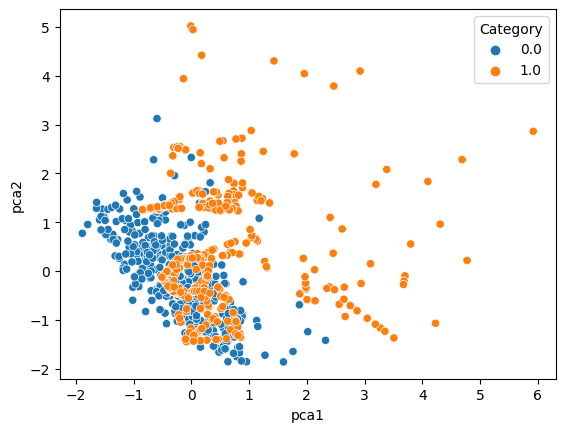

In [21]:
temp = pd.DataFrame(X_train_ada, columns=['pca1', 'pca2'])
sns.scatterplot(data=temp, x="pca1", y="pca2", hue=Y_train_ada)

<Axes: xlabel='pca1', ylabel='pca2'>

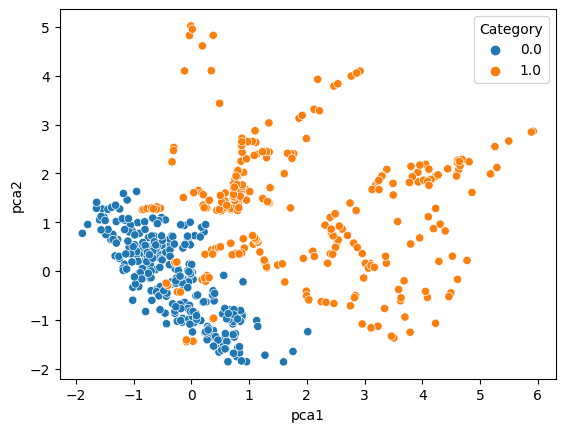

In [22]:
temp = pd.DataFrame(X_train_enn, columns=['pca1', 'pca2'])
sns.scatterplot(data=temp, x="pca1", y="pca2", hue=Y_train_enn)

In [23]:

# pca_pipeline = Pipeline(
#     [
#       ('scaler', StandardScaler()),
#       ('pca_dim_reduction', PCA(n_components=2)),
#     ]
# )

# hcv_pca = pd.DataFrame(pca_pipeline.fit_transform(hcv), columns = ['pca1', 'pca2'])
# sns.scatterplot(data=hcv_pca, x='pca1', y='pca2', hue=hcv_target)

# PCA n=3

In [24]:
from mpl_toolkits.mplot3d import Axes3D


pca_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('pca_dim_reduction', PCA(n_components=3)),
    ]
)

hcv_pca = pd.DataFrame(pca_pipeline.fit_transform(hcv), columns = ['pca1', 'pca2', 'pca3'])

In [25]:
std_scaler = StandardScaler()

smote = SMOTE()
adasyn = ADASYN()
smoteenn = SMOTEENN()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(hcv_pca, hcv_target, stratify=hcv_target)

x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

X_train_smt, Y_train_smt = smote.fit_resample(x_train, y_train)
X_train_ada, Y_train_ada = adasyn.fit_resample(x_train, y_train)
X_train_enn, Y_train_enn = smoteenn.fit_resample(x_train, y_train)

In [27]:
print(X_train_smt.shape)
print(X_train_ada.shape)
print(X_train_enn.shape)
print()

print(Y_train_smt.shape)
print(Y_train_ada.shape)
print(Y_train_enn.shape)
print()


temp, count = np.unique(Y_train_smt, return_counts=True)
print(np.asarray((temp, count)).T)
print()

temp, count = np.unique(Y_train_ada, return_counts=True)
print(np.asarray((temp, count)).T)
print()

temp, count = np.unique(Y_train_enn, return_counts=True)
print(np.asarray((temp, count)).T)
print()

(800, 3)
(806, 3)
(637, 3)

(800,)
(806,)
(637,)

[[  0. 400.]
 [  1. 400.]]

[[  0. 400.]
 [  1. 406.]]

[[  0. 301.]
 [  1. 336.]]



In [28]:
from mpl_toolkits.mplot3d import Axes3D
!pip install -q ipympl
# !pip install pyqt5

from google.colab import output
output.enable_custom_widget_manager()

# %matplotlib widget
# %matplotlib notebook

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

temp = pd.DataFrame(X_train_enn, columns=['pca1', 'pca2', 'pca3'])

x = temp['pca1']
y = temp['pca2']
z = temp['pca3']

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

colors = {0.: "tab:green", 1.: "tab:orange"}

ax.scatter(x, y, z, c=Y_train_enn.map(colors))
plt.title("enn")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<IPython.core.display.Javascript object>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
!pip install -q ipympl
# !pip install pyqt5

from google.colab import output
output.enable_custom_widget_manager()

# %matplotlib widget
# %matplotlib notebook

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

temp = pd.DataFrame(X_train_smt, columns=['pca1', 'pca2', 'pca3'])

x = temp['pca1']
y = temp['pca2']
z = temp['pca3']

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

colors = {0.: "tab:green", 1.: "tab:orange"}

ax.scatter(x, y, z, c=Y_train_smt.map(colors))
plt.title("smt")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
!pip install -q ipympl
# !pip install pyqt5

from google.colab import output
output.enable_custom_widget_manager()

# %matplotlib widget
# %matplotlib notebook

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

temp = pd.DataFrame(X_train_ada, columns=['pca1', 'pca2', 'pca3'])

x = temp['pca1']
y = temp['pca2']
z = temp['pca3']

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

colors = {0.: "tab:green", 1.: "tab:orange"}

ax.scatter(x, y, z, c=Y_train_ada.map(colors))
plt.title("ada")
plt.show()